# This is my first project in lenear regration 
The ideia in this project is to analise the factores that influence the variable Seoul Bike dataset by Exploring data for outlires and missing value, also plot the correlation between variable in the data and finally build the linear regrassion model to predict a good result

In [1]:
# First of all i will import all libraries that i will need in this project

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
# create a variable data and read my data SeoulBikeData.csv using the pandas function pd.read_csv file

In [3]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Linear_regretion_project\\SeoulBikeData.csv")

In [4]:
# print the 10 first elements from my data and analise them.
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


 What are the factors that influence the number of bikes rented?
 
The factories that influence the number of bikes rented are : 
Temperature(C) because when we have a good weather the probability to get more number of bikes rented
Is high because people can enjoy more  the environment and is less at risk of having accidents for example


In [5]:
data['Seasons']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object

In [2]:
# In my first analises exploratore of data i eliminated all categorical data(seasons, holiday,Functioning Day and Date)
# but after a logical analyze i can saw cleary seasons and holidays can have influence in the Rented bike because thoses days
# families and friends can have more time together to do fine thing. for that reason and to see in fact if thoses
# variable have good corelationship with rented data, I convert thoses object data in numerical data by using the labelEncoder
# i did not had a good corelation between binker and renter bike, so I convert categorical data into numerical data to see
# if i will get better correlactionship
#  unfortunately the result of the correlation was not good

In [7]:
# import the labriry to convert categorical data to numeric data
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:

# convert categorical data seasons into numerical data season1
# convert categorical data Holiday into numerical data Holiday1

data["Season1"] = le.fit_transform(data["Seasons"])
data["Holiday1"] = le.fit_transform(data["Holiday"])
data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Season1,Holiday1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,0,1


In [10]:
# after converting the categorical data to numerical data, we can see thoses new variable ( season1 and holiday1)in my table 

In [11]:
# for more analise to see which element influence the number bikes rented i will create a scatter plot  and see the relationship between
# thoses element in my data

In [12]:
# Get some statist information about my data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  Season1 

In [14]:
# As we can see in the info, we do not have messing value , all variable have 8760 non_null value
# the only diference that we have in our data is that, some of those value are object, some are int and float
#Now, I take this opportunity to say that I will work only with numerical value- that's mean just int and float values

In [15]:
data.describe () # with the describe function, we can see some statitics in our data SeoulBikeData.csv like mean, max...

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Season1,Holiday1
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000


In [16]:
# let's look just informatation about rented bike
data['Rented Bike Count'].describe ()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [17]:
data['Hour']

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int64

In [18]:
# so now i will work just with numerical value, that's mean, i will drop Seasons,Holiday,Functioning Day and Date from my data
# because those variable are object as we can se in data.info

In [19]:
list(set(data.dtypes.tolist()))

[dtype('int32'), dtype('int64'), dtype('O'), dtype('float64')]

In [20]:
data_num = data.select_dtypes(include = ['float64', 'int64','int32'])

In [21]:
data_num # those categorical variable are int 32

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Season1,Holiday1
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1


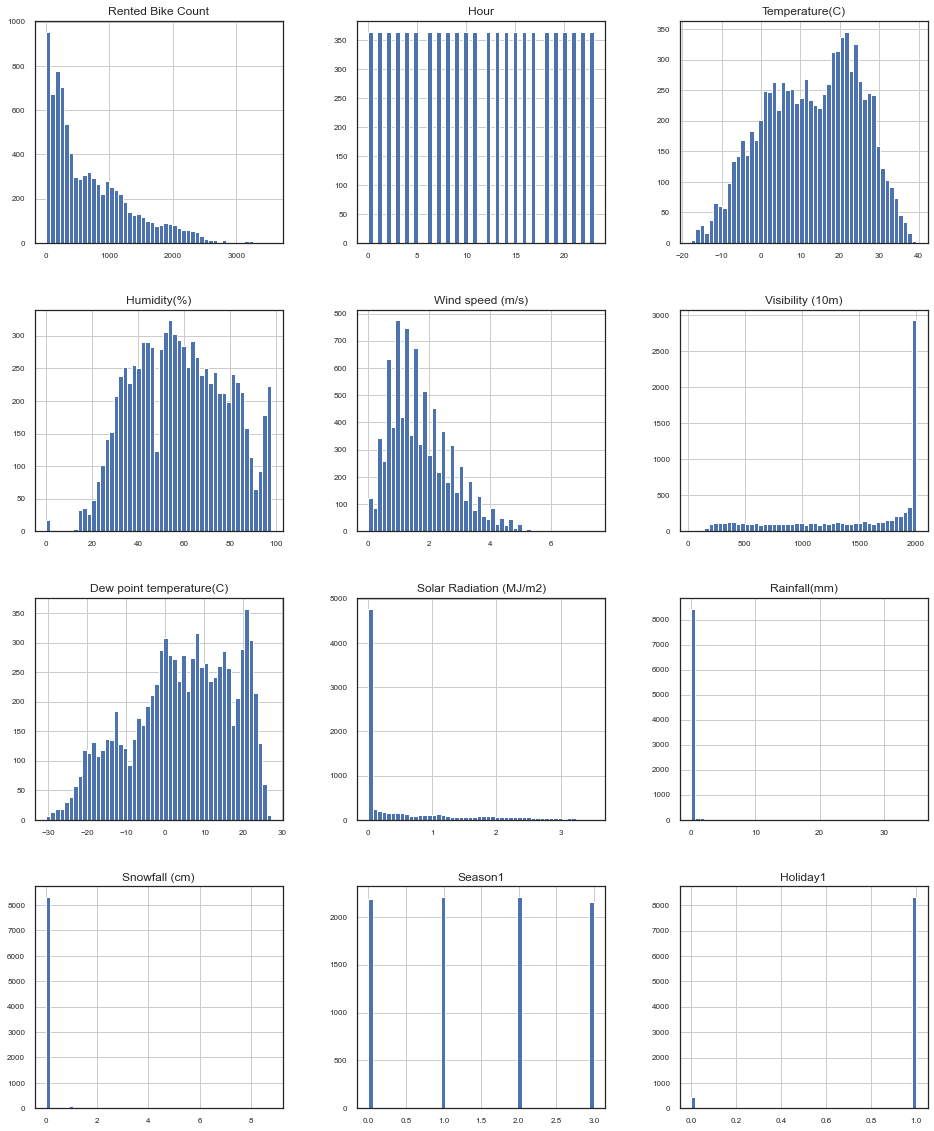

In [22]:
## As we can see now our new table have just numerical variables
# i will plot all variable with Rented bike Count to see the relationship 
#data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
#=============

#i will use the data
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [23]:
# I will try to see the list of strongly correlation between rented bike and others value,
#i will asume value 30% or more

 #data_num_corr = data_num.corr()['Rented Bike Count'][1:]
data_corr = data.corr()['Rented Bike Count'][1:]
golden_features_list = data_corr[abs(data_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with Rented Bike Count:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with Rented Bike Count:
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Name: Rented Bike Count, dtype: float64


In [24]:
# As we can see, i had 3 variable strongly correlated with rented bike, temperature,hours and Dew poitn temperature

In [25]:
# now i will Plot the numerical features and see which ones have very few or explainable outliers
# and remove the outliers from those feature

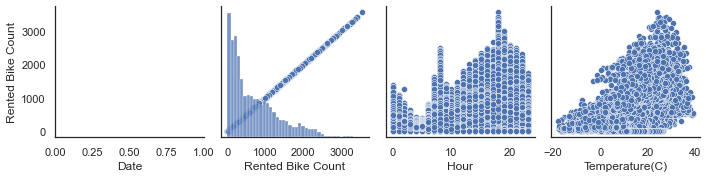

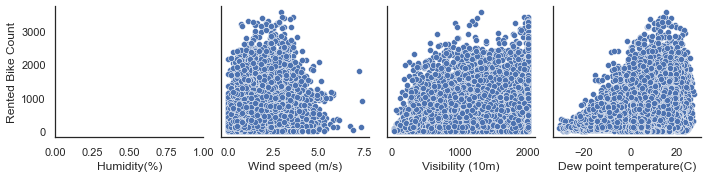

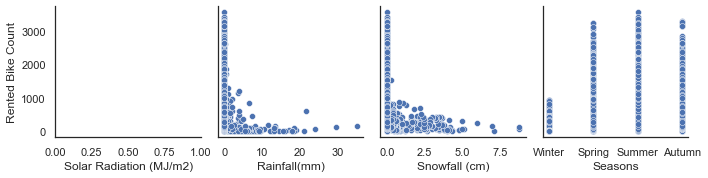

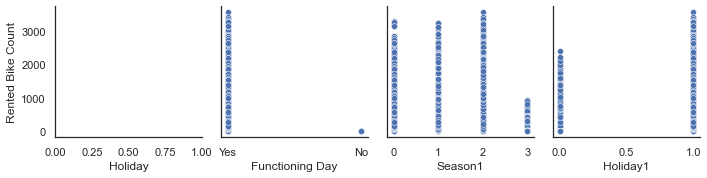

In [26]:
for i in range(0, len(data.columns), 4):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+4],
                y_vars=['Rented Bike Count'])

# Nota
 We can see, we have 1o element correlacted with Rented bike Count,
Rented bike count with Rented bick count we have a perfect correlaction, we have a lenear correlation
Wind speed and Rainfall I could not see the result and I  do not know that cause that, 
if I analise the bar plot for those two variable and see the table as well I can see that, the value are two smaller,almost zero
the corelaction detbween Rented bike count and Hour, temperature wind, visibilit, Dew point Solar Radiation are positive.
we can see that, when Rented increase thoses positive correlationship increase as well
We have some positive correlaction between Rented bick and Hour,	Temperature(C) and Wind speed (m/s). Also some negative correlationship. 

In [27]:
print("Dimension of SeoulBikeData dataset", data.shape)


Dimension of SeoulBikeData dataset (8760, 16)


In [28]:
#Spliting dataframe into train and test by manually as intially we have two dataframes train and test.
data_SeoulBikeData = data[:8760]
All_data_corr = data_SeoulBikeData.corr()
All_data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Season1,Holiday1
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.530575e-01,0.072338
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,9.516382e-18,0.000000
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-3.352067e-01,0.055931
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.203104e-01,0.050278
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.089520e-01,-0.023017
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.477622e-02,-0.031773
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-3.290270e-01,0.066759
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-7.581168e-02,0.005077
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.929617e-02,0.014269
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.454573e-01,0.012591


In [29]:
# If we see the correlation between Rented bike count and all data in the table All_data_corr we can see the same . 3 value mor than 30%
# the corelaction between all variable, not just with rented bike are too smol
# relatively to those categorical data that i transform into numerical  data do not work. as we can see in the table
# the corelaction are negative and very close tho zero (season) and positive close to zero as weel for holiday


In [30]:
# in the heatmap below we can undertand better the value of correlaction between all variable 

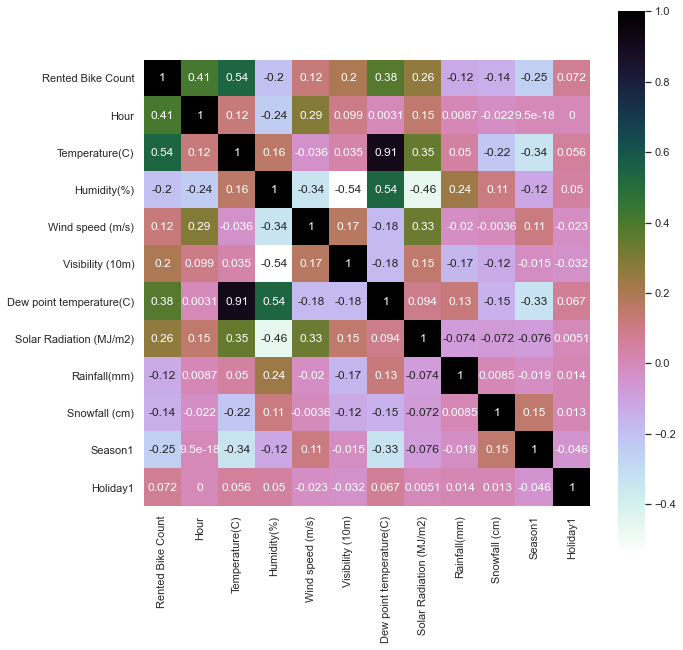

In [31]:
corr = data_SeoulBikeData.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [33]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val # AS we can see below, we do not have missing value

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Season1                     0
Holiday1                    0
dtype: int64

In [34]:
# now i will extract all feature that have a good correlationship with Rented bike

In [35]:
features_col=['Hour','Temperature(C)','Dew point temperature(C)']

In [36]:
x= data_num[features_col]

In [37]:
x

,Hour,Temperature(C),Dew point temperature(C)
0,0,-5.2,-17.6
1,1,-5.5,-17.6
2,2,-6.0,-17.7
3,3,-6.2,-17.6
4,4,-6.0,-18.6
...,...,...,...
8755,19,4.2,-10.3
8756,20,3.4,-9.9
8757,21,2.6,-9.9
8758,22,2.1,-9.8


In [43]:
y=data_num['Rented Bike Count']

In [44]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [40]:
# split my data
# usinf function train_test_function

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# put x and y variable in the train_test_split function 
# why we have to put x and y in train_test?

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [46]:
print ("X_train: ", x_train)
print ("y_train: ", y_train)
print("X_test: ", x_test)
print ("y_test: ", y_test)

X_train:        Hour  Temperature(C)  Dew point temperature(C)
458      2            -7.8                     -12.6
6000     0            29.1                      24.6
6897     9            22.3                      16.3
1960    16             5.1                     -18.0
5308     4            20.6                      20.1
...    ...             ...                       ...
2895    15            18.9                       0.0
7813    13            19.4                       3.5
905     17             2.3                     -12.3
5192     8            23.6                      22.3
235     19             1.6                      -6.9

[6570 rows x 3 columns]
y_train:  458      108
6000     853
6897    1201
1960     393
5308     133
        ... 
2895    1542
7813    1064
905      349
5192    1836
235      181
Name: Rented Bike Count, Length: 6570, dtype: int64
X_test:        Hour  Temperature(C)  Dew point temperature(C)
4136     8            18.2                      11.0
6705     

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6570, 3)
(6570,)
(2190, 3)
(2190,)


In [ ]:
# now i will do the lenear regression


this is just for my analize and undestand the data 
print(x-x_test)
print(x-x_train)
print(y-y_test) # why the result is NaN
print(y-y_train) # why the result is 0.0

In [47]:
x.head(5)

,Hour,Temperature(C),Dew point temperature(C)
0,0,-5.2,-17.6
1,1,-5.5,-17.6
2,2,-6.0,-17.7
3,3,-6.2,-17.6
4,4,-6.0,-18.6


In [76]:
x_test.head(5)

,Hour,Temperature(C),Dew point temperature(C)
4136,8,18.2,11.0
6705,9,23.5,18.1
3538,10,15.3,4.9
6583,7,21.1,17.7
1993,1,-2.2,-9.3


In [48]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()

# create a linear regression

In [66]:
# trainig my data
ln_reg.fit(x_train, y_train)


LinearRegression()

In [62]:
# find the interception
print(ln_reg.intercept_) # my b

-166.19871117622552


In [63]:
ln_reg.predict(x_test)

array([ 714.05306732,  841.90620735,  766.45742566, ..., -163.23091312,
        841.79068338,  -40.81894743])

In [89]:
y_test

4136     694
6705    1186
3538     789
6583     511
1993     190
        ... 
1909     337
285      270
314      107
3875     972
968      387
Name: Rented Bike Count, Length: 2190, dtype: int64

In [90]:
# look for acurate of the model call the score method. this method use the X-test to predict the value and compare with Y-tes

In [91]:
ln_reg.score(x_test,y_test)# we can se that, the acurance is 44%

0.4401329986300595

In [85]:
# find the coeficint
print (ln_reg.coef_) # m1, m2,m3

[ 27.53543493  50.51156468 -23.57656165]


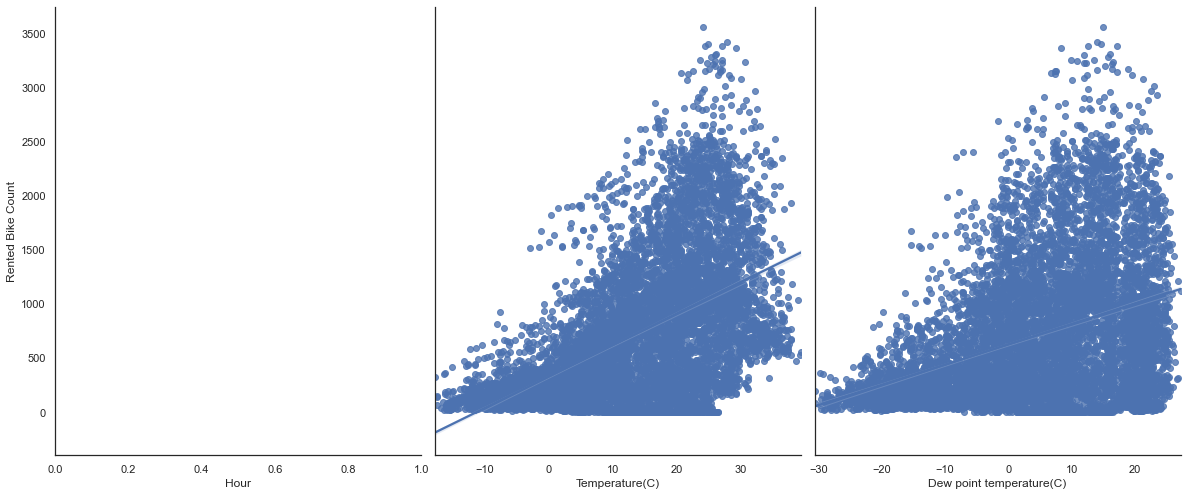

In [27]:
sns.pairplot(data_num,x_vars=['Hour','Temperature(C)','Dew point temperature(C)'],y_vars='Rented Bike Count',size=7,aspect=0.8,kind='reg')

In [38]:
# pretict test result to see if i have acurat result

In [86]:
y_pred=ln_reg.predict(x_test)

In [87]:
y_pred

array([ 714.05306732,  841.90620735,  766.45742566, ..., -163.23091312,
        841.79068338,  -40.81894743])

In [41]:
# evaluate the model

In [42]:
import matplotlib.pyplot as plt

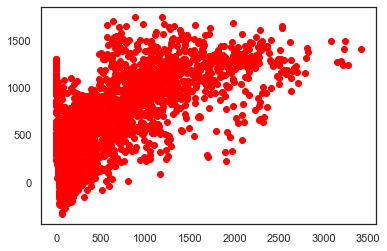

In [51]:
plt.scatter (y_test,y_pred, color='red')
# vizualise predit value
#plt.figure(figsize=(15,10))
#plt.scatter (y_test,y_pred)
#plt.xlabel('atual', color='red' )
#plt.ylabel('predict')
#plt.title('atual_preditc')

In [ ]:
# TRY DO PLOT THE YPREDIT WITH X VALUE, BUT I COULD T BECAUSE THE HAVE NOT HAVE THE SAME SIZE

In [52]:
# print the predict value for us model

In [55]:
predict_y_va=pd.DataFrame({'Actual_value':y_test,'Predict_value':y_pred,'Diference':y_test-y_pred })
# print the first 10 elem
predict_y_va[0:10] # QUESTION why my y_test is not the same as my y value?
# why we use y_test to predict and not y for example. why y and y predict does not have the same size?

,Actual_value,Predict_value,Diference
4136,694,714.053067,-20.053067
6705,1186,841.906207,344.093793
3538,789,766.457426,22.542574
6583,511,675.038207,-164.038207
1993,190,-30.526695,220.526695
6751,511,587.180471,-76.180471
6483,281,561.511037,-280.511037
6951,222,944.812224,-722.812224
4406,1396,1573.652011,-177.652011
2021,39,29.062997,9.937003


In [92]:
# this par is just for my untestand better my data

In [50]:
# Regularization of my data. we have to method that we can use.. LASSO (L1 Regularization) and Ridge Regression (L2 Regularization)

In [51]:
#Ridge(L2) Regression

In [52]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [54]:
ridge.fit(x_train,y_train)
ridge_score = ridge.score(x_test,y_test)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 27.53544386,  50.51110685, -23.57615744])

In [55]:
# Lasso(L1) Regression

In [56]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [57]:
lasso.fit(x_train,y_train)
lasso_score = lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 27.53076649,  50.43476566, -23.50644054])

In [59]:
print (ln_reg.coef_)

[ 27.53543493  50.51156468 -23.57656165]
